In [9]:
!pip install SciencePlots

  Obtaining dependency information for SciencePlots from https://files.pythonhosted.org/packages/80/0c/a3980bf9d0dcca352f5e74ccbac889c5bcf6a12861628bb4f91eeaf50ab9/SciencePlots-2.1.0-py3-none-any.whl.metadata


In [29]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
plt.style.use(['science','no-latex'])




In [7]:
ss = pd.read_csv('sample_submission.csv',index_col='id')

In [11]:
ss.shape

(3500, 37)

In [31]:
ss.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,0.650,14.515,5.845,1.285,0.429,0.030,0.050,0.064,0.730,1.075,0.056,0.567,0.400,1.500,1.560,19.355,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,1.848,8.625,12.175,0.280,0.440,0.089,1.360,0.064,0.902,1.454,0.056,0.190,2.347,5.105,2.095,19.355,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,0.650,17.144,24.645,0.380,0.440,0.060,0.050,0.082,0.902,2.025,0.056,0.567,1.700,1.700,3.960,4.900,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,1.730,3.870,8.410,1.480,1.380,0.050,0.050,0.070,0.530,1.740,0.050,0.064,1.500,1.500,2.020,3.960,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,0.650,3.850,5.845,0.280,0.440,0.105,0.115,0.074,1.252,1.075,0.071,0.190,1.050,1.150,2.095,3.902,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [20]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3500 non-null   int64  
 1   target  3500 non-null   float64
 2   O2_1    3500 non-null   float64
 3   O2_2    3500 non-null   float64
 4   O2_3    3500 non-null   float64
 5   O2_4    3500 non-null   float64
 6   O2_5    3500 non-null   float64
 7   O2_6    3500 non-null   float64
 8   O2_7    3500 non-null   float64
 9   NH4_1   3500 non-null   float64
 10  NH4_2   3500 non-null   float64
 11  NH4_3   3500 non-null   float64
 12  NH4_4   3500 non-null   float64
 13  NH4_5   3500 non-null   float64
 14  NH4_6   3500 non-null   float64
 15  NH4_7   3500 non-null   float64
 16  NO2_1   3500 non-null   float64
 17  NO2_2   3500 non-null   float64
 18  NO2_3   3500 non-null   float64
 19  NO2_4   3500 non-null   float64
 20  NO2_5   3500 non-null   float64
 21  NO2_6   3500 non-null   float64
 22  

## Separate columns into types

In [32]:
ss.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3500.0,1749.500000,1010.507298,0.000,874.7500,1749.500,2624.2500,3499.000
target,3500.0,8.473834,1.885712,1.300,7.4700,8.280,9.1100,65.930
O2_1,3500.0,8.216993,3.040743,0.000,7.1000,7.890,9.1000,46.950
O2_2,3500.0,9.291581,6.817822,0.000,7.3000,8.300,8.7000,65.950
O2_3,3500.0,9.633064,1.439039,4.900,8.7700,9.500,9.5450,16.900
O2_4,3500.0,8.065733,1.463881,2.300,6.8300,7.980,9.2650,21.800
O2_5,3500.0,5.671581,2.721399,0.200,4.5500,5.800,7.0150,59.400
O2_6,3500.0,9.461363,1.140365,0.000,8.9800,9.430,10.0700,40.190
O2_7,3500.0,6.547433,1.663266,0.000,5.8775,6.430,7.1500,15.900
NH4_1,3500.0,0.340525,0.284751,0.020,0.2145,0.247,0.3700,4.200


In [ ]:
O2_cols = [col for col in ss.columns if 'O2' in col and 'N' not in col]
NH4_cols = [col for col in ss.columns if 'NH4' in col]
NO2_cols = [col for col in ss.columns if 'NO2' in col]
NO3_cols = [col for col in ss.columns if 'NO3' in col]
BOD5_cols = [col for col in ss.columns if 'BOD5' in col]

## Correlation with Target

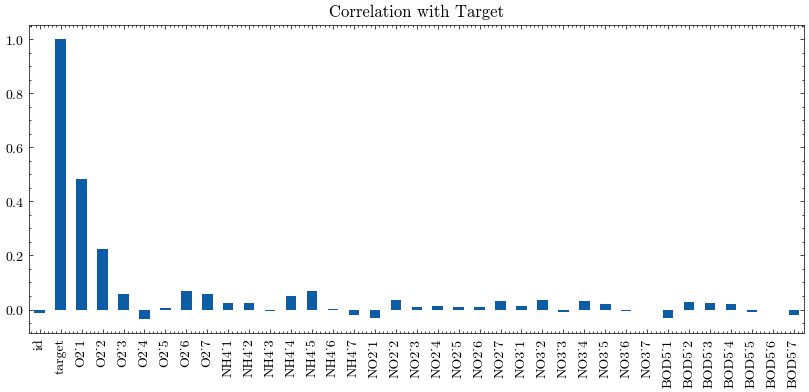

In [13]:
plt.figure(figsize=(10,4))
ss.corrwith(ss.target).plot(kind='bar')
plt.title('Correlation with Target');

## Feature Correlations

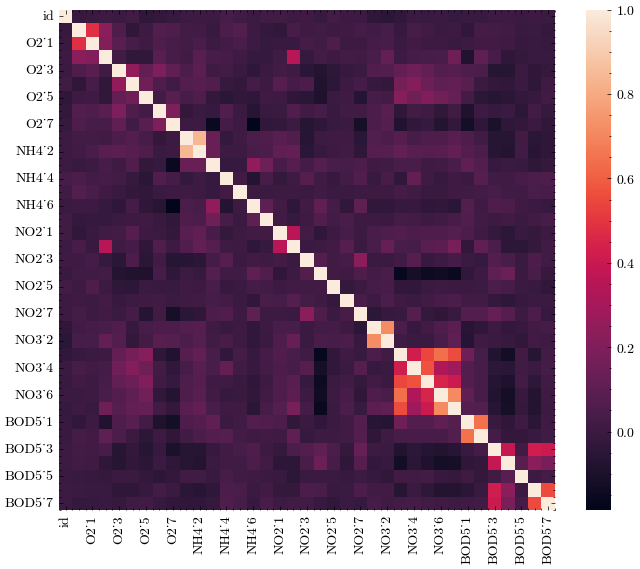

In [16]:
plt.figure(figsize=(8,6.5))
sns.heatmap(ss.corr());

# EDA

## Feature Distributions

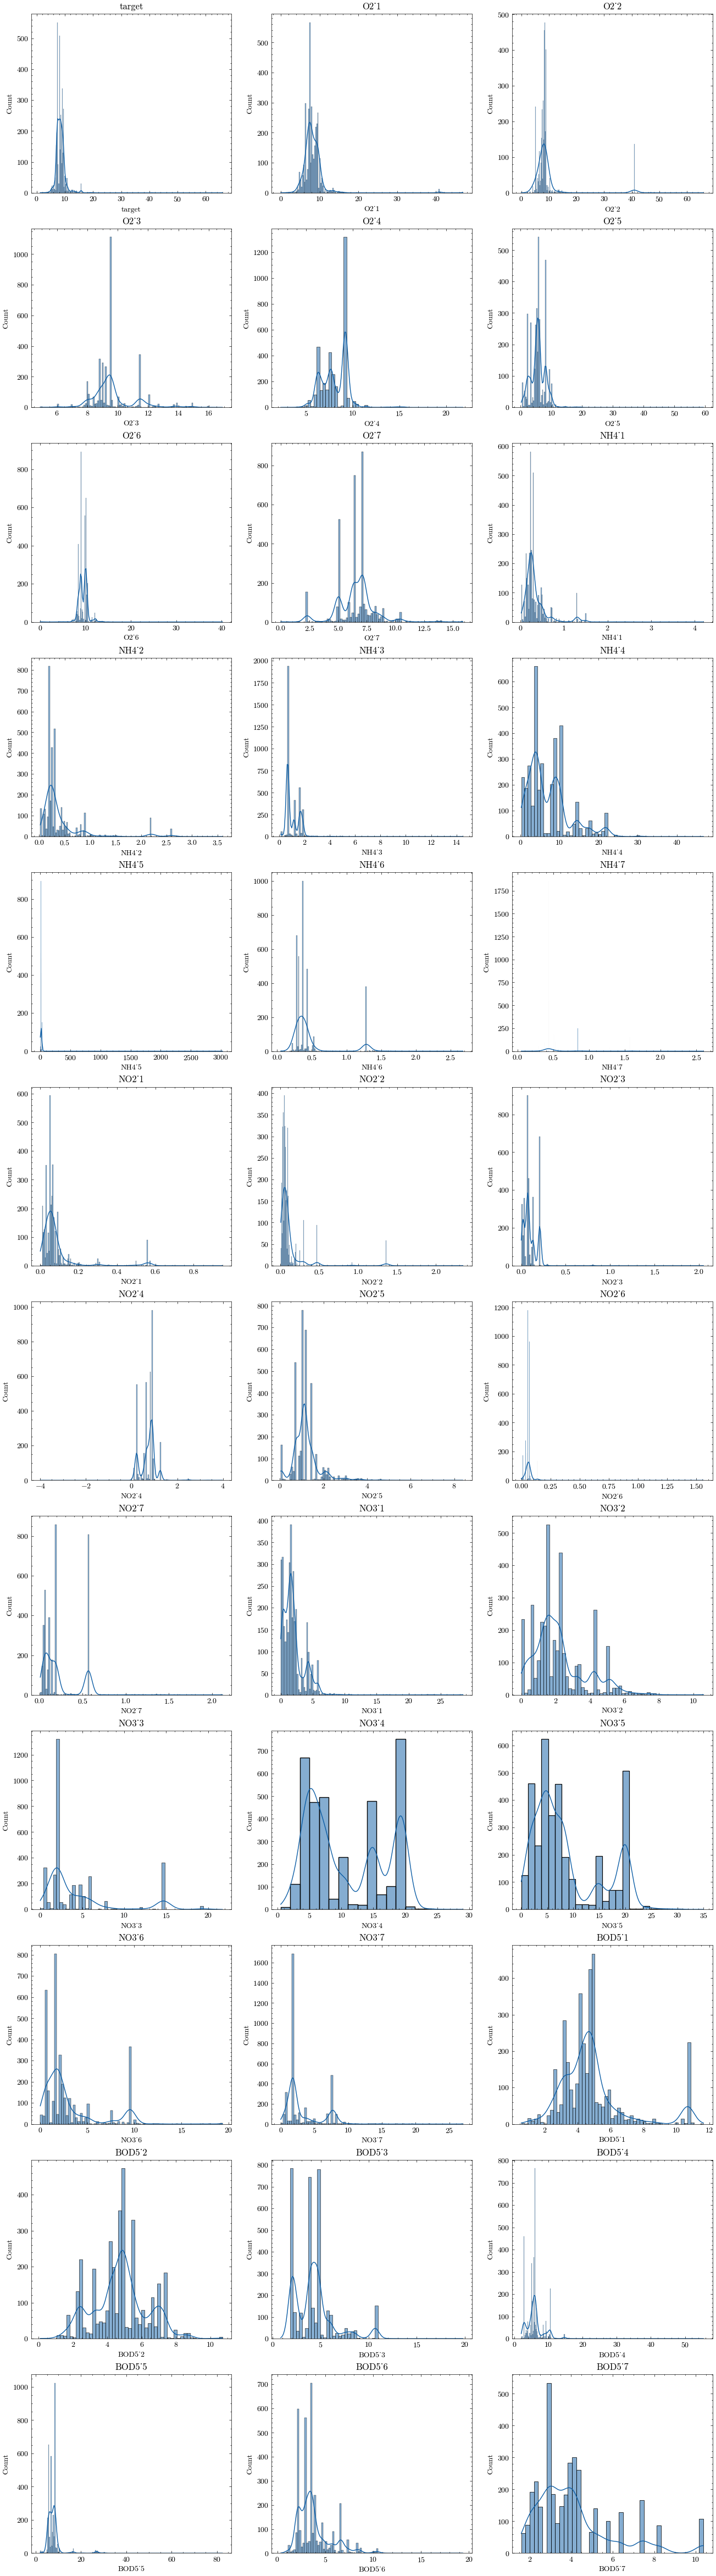

In [17]:
features = [col for col in ss.columns if ss[col].dtype=='float']
rows = int(np.ceil(len(features)/3)) 
plt.figure(figsize=(16,5*rows)) 
for i,col in enumerate(features): 
  plt.subplot(rows,3,i+1) 
  sns.histplot(ss[col],kde=True) 
  plt.title(col)

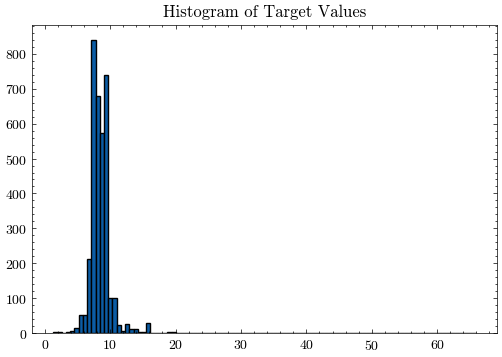

In [22]:
# target distribution alone
y = ss.target
plt.figure(figsize=(6,4))
plt.hist(y,bins=100,ec='k',lw=1)
plt.title('Histogram of Target Values');

## Bivariate with target

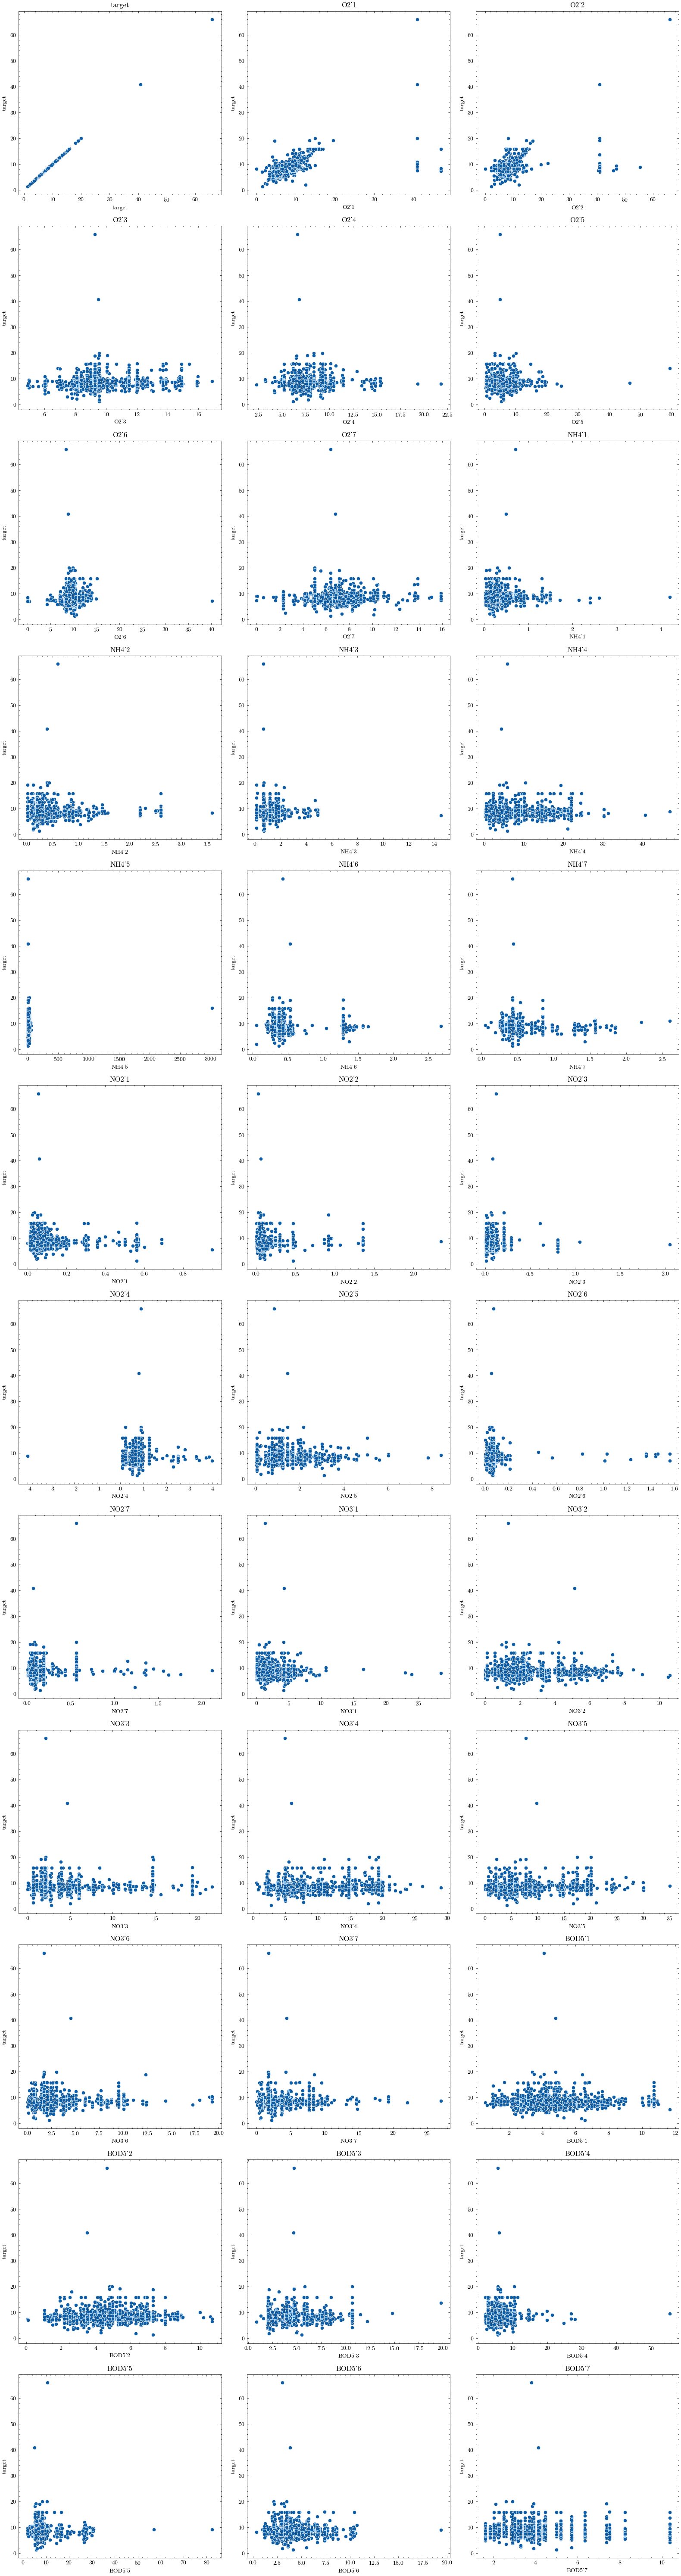

In [19]:
features = [col for col in ss.columns if ss[col].dtype=='float']
rows = int(np.ceil(len(features)/3)) 
plt.figure(figsize=(16,5*rows),tight_layout=True) 
for i,col in enumerate(features): 
  plt.subplot(rows,3,i+1) 
  sns.scatterplot(x=ss[col],y=ss.target) 
  plt.title(col)

### Takeaways
* Only visually see signal in O2_1 and O2_2
* Some definite outliers
* Try a combo of features

In [33]:
y = ss.target
train = ss.copy()

In [35]:
# from comp description
from sklearn.ensemble import RandomForestRegressor

#y_train = train.pop('target') # train is your submission!
rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=7,
    n_jobs=-1,
    random_state=42)
rf.fit(train, y)

preds = rf.predict(train)
#y_hat = rf.predict(test) # test set is hidden 

In [36]:
preds

array([8.59225238, 9.09849201, 8.2113099 , ..., 9.94747083, 9.50143394,
       8.51421196])

(array([  3.,   1.,   1.,   4.,   6.,   0.,  34.,  56.,  25.,  58., 613.,
        411., 711., 430., 489., 346., 127.,  20.,  57.,   8.,   6.,  24.,
          6.,  13.,   9.,   1.,   1.,  29.,   2.,   1.,   0.,   0.,   0.,
          1.,   3.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.95101736,  2.44803767,  2.94505799,  3.44207831,  3.93909862,
         4.43611894,  4.93313926,  5.43015957,  5.92717989,  6.42420021,
         6.92122052,  7.41824084,  7.91526116,  8.41228147,  8.90930179,
         9.4063221 ,  9.90334242, 10.40036274, 10.89738305, 11.39440337,
        11.89142369, 12.38

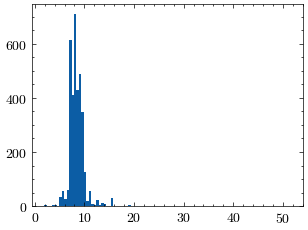

In [38]:
plt.hist(preds,bins=100)

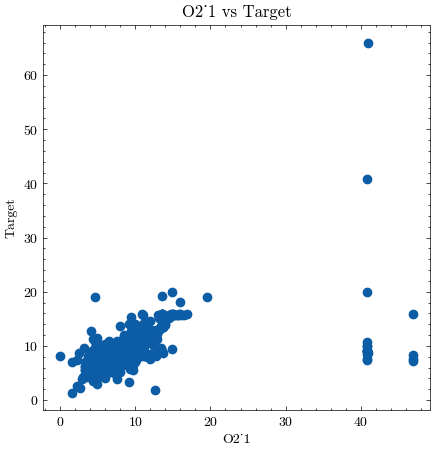

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(x=ss.O2_1,y=ss.target)
plt.xlabel('O2_1')
plt.ylabel('Target')
plt.title('O2_1 vs Target');

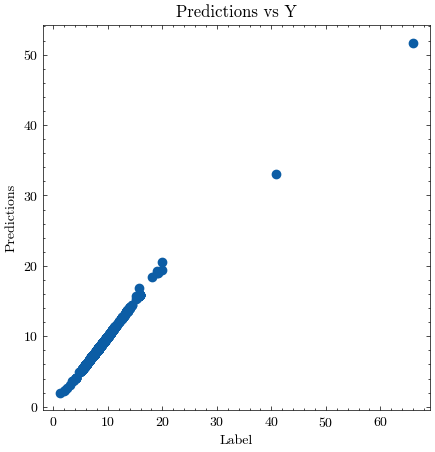

In [52]:
    # predictions vs actual
plt.figure(figsize=(5,5))
plt.scatter(x=ss.target,y=preds)
plt.xlabel('Label')
plt.ylabel('Predictions')
plt.title('Predictions vs Y');